In [1]:
library(ggplot2)
library(dplyr)


Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
snr_data_path <- file.path("../results/snr_data.csv")
snr_data <- read.csv(snr_data_path)
head(snr_data)

,well,channel,z.slice,SNR
,<chr>,<chr>,<int>,<dbl>
1,G8-1,405,0,2.471419
2,G8-1,405,1,1.957894
3,G8-1,405,2,1.687372
4,G8-1,405,3,1.605053
5,G8-1,405,4,1.591090
6,G8-1,405,5,1.569552


In [3]:
# min-max normalize the z.slice values for each well
snr_data <- snr_data %>%
  group_by(well) %>%
  mutate(z.slice = (z.slice - min(z.slice)) / (max(z.slice) - min(z.slice)))
  

In [4]:
# replace channel numbers with channel names
snr_data$channel <- gsub("405", "Hoechst", snr_data$channel)
snr_data$channel <- gsub("488", "ER", snr_data$channel)
snr_data$channel <- gsub("555", "AGP", snr_data$channel)
snr_data$channel <- gsub("640", "Mito", snr_data$channel)
snr_data$channel <- gsub("TRANS", "Brightfield", snr_data$channel)

Warning message in geom_line(aes(group_by = well)):
“Ignoring unknown aesthetics: group_by”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


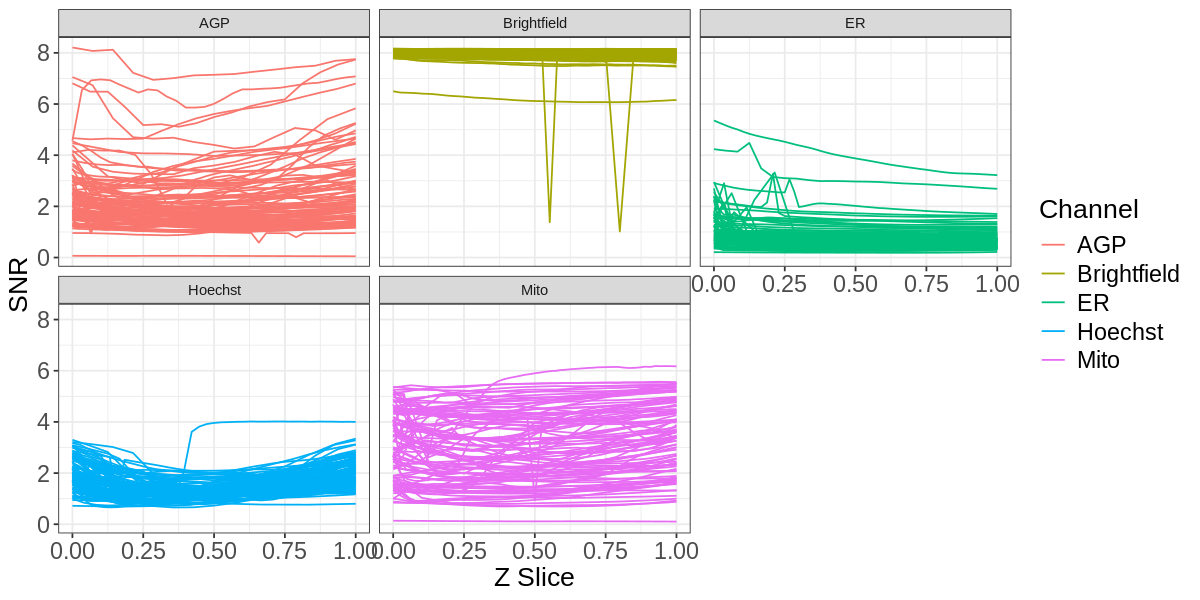

In [5]:
width <- 10
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
snr_plot <- (
    ggplot(snr_data, aes(x=z.slice, y=SNR, color=channel))
    + geom_line(aes(group_by=well))
    + labs(x="Z Slice", y="SNR", color="Channel")
    + theme_bw()
    + theme(
        legend.title=element_text(size=16),
        legend.text=element_text(size=14),
        axis.title=element_text(size=16),
        axis.text=element_text(size=14)
    )
    + facet_wrap(~channel)
)
print(snr_plot)